# SISR - Single Image Super Resolution

The goal of single image super resolution is to map a low resolution image to a high resolution image. We can then apply the mapping onto a poor quaility image to get a super resoluton image. The method used in this notebook is Super Resolution Generative Adverserial Network (SRGAN). SISR has not had heavy reserach in satilete imagery as compared to other types of imagery. To bring interest into SISR satilette imagery, we show an example here. We first load in the some test data, load in a pretrained model (trained on satilete imagery), and then test the model on some unseen data.  


### SRGAN - Super Resolution Generative Adverserial Network

The method we use is an GAN that uses a generator to apply super resolution to the low resolution images and a discrimitor that is trained to decipher between a real image and a fake image. This allows us to learn a real represention of a high resolution image. See the paper to read more about my exploration in SRGAN. This SRGAN tiles a starting image down into chips before running the super resolution. We then combine the super resolution tiles back into one image to remake the orginal image. 

In [1]:
# Import packages
from matplotlib import pyplot as plt
from keras.models import load_model
import sys
import re
import os

sys.path.append("portfolio/utils")
os.chdir("../")
import Utils, Utils_model
from Utils_model import VGG_LOSS

Using TensorFlow backend.


In [2]:
# Parameters Config
input_hig_res = "portfolio/data"
ext = "png"
number_of_images = 1
downsample_ratio = 4 
patch_size = (50,50,3)
output_dir = "portfolio/"
model = "portfolio/models/gen_model_epoch3000_res50x50_ratio4.h5"
output_style = False

In [3]:
# Load Data
x_test_lr, x_test_hr, patch_info = Utils.load_data(input_hig_res, 
                                                   ext, 
                                                   number_of_images, 
                                                   0, # train test ratio
                                                   downsample_ratio, 
                                                   patch_size, 
                                                   type = 'test_model_hr')

Loading data from: portfolio/data
Found 1 images
Image:   0  Shape: (320, 750, 3) -> Num Tiles: 8 Tile Shape: (2, 4) Padding: (80, 50)
Converted images to (8, 200, 200, 3)


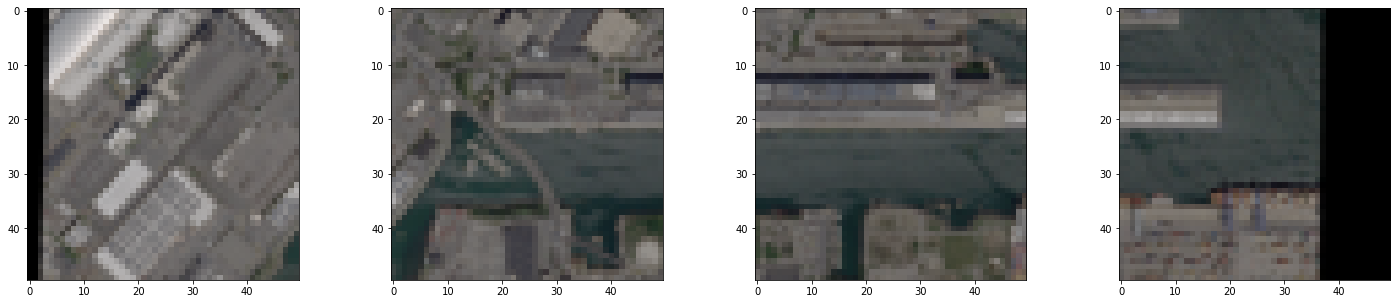

In [4]:
# Example Images Chips
f, axarr = plt.subplots(1, 4, figsize=(25, 5))
axarr[0].imshow(Utils.denormalize(x_test_lr[0]))
axarr[1].imshow(Utils.denormalize(x_test_lr[1]))
axarr[2].imshow(Utils.denormalize(x_test_lr[2]))
axarr[3].imshow(Utils.denormalize(x_test_lr[3]))

In [5]:
# Load Model
loss = VGG_LOSS(patch_size)
model = load_model(model , custom_objects={'vgg_loss': loss.vgg_loss})

Running Super Resolution...
Image 0 Score: ('PSNR 21.50540', 'SSIM 0.52409 0.53126', 'UQI 0.95339')
img_low_res: (80, 188, 3) img_generated: (320, 750, 3) img_high_res: (320, 750, 3)


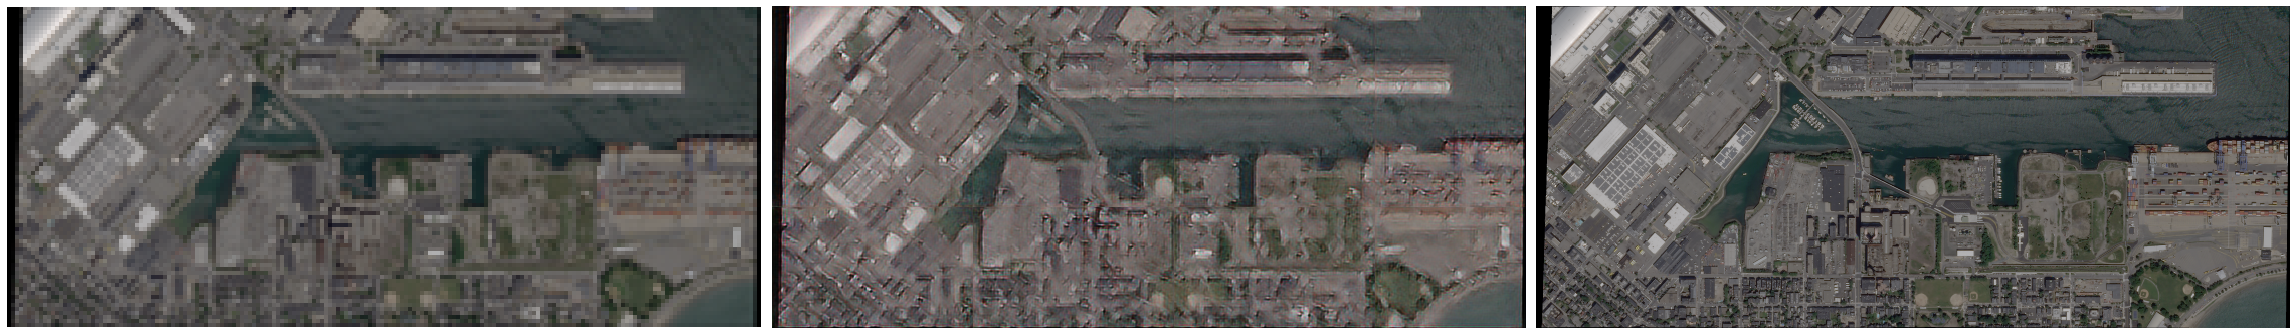

In [6]:
# Test Model
Utils.plot_generated_images_test_hr(output_dir, 
                                    model, 
                                    x_test_hr, 
                                    x_test_lr, 
                                    downsample_ratio, 
                                    patch_info, 
                                    output_style)